## Explore the dataset.

In [1]:
# Useful imports
import numpy as np
from fastai.vision.all import get_files
import matplotlib.pyplot as plt
# import librosa 
# import librosa.display as display

In [2]:
# import dataset
files = get_files('../data/raw', recurse=True, folders=None)

## Reading from .wav files and converting to spectogram
Using scipy.io to read the .wav files and convert them to spectograms.

In [3]:
# unused functions
unused = """
def plot_wave_function(file):
    data, sample_rate = librosa.load(file)
    display.waveshow(data)
def to_spectogram(file, sample_rate=-1):

    if sample_rate == -1:
        data, sr = librosa.load(file)
        DATA = librosa.stft(data)
        DATA_db = librosa.amplitude_to_db(abs(DATA))
    
        plt.figure(figsize=(14, 5))
        display.specshow(DATA_db, x_axis = 'time', y_axis = 'hz')
        plt.colorbar()
        
    else:
            data, sr = librosa.load(file, sr=sample_rate)
            DATA = librosa.stft(data)

            DATA_db = librosa.amplitude_to_db(abs(DATA))

            plt.figure(figsize=(14, 5))
            display.specshow(DATA_db, sr=sample_rate, x_axis = 'time', y_axis = 'hz')
            plt.colorbar()"""

In [4]:
# run the following 3 cells to convert .wav files to spectograms.
import os
import wave
import pylab
plt.ioff() # ion turns on display, ioff turns off

def graph_spectrogram(wav_file):
    sound_info, frame_rate = get_wav_info(wav_file)
    pylab.figure(num=None, figsize=(5, 5), frameon=False)
    pylab.subplot(111)
    pylab.axis(False)
    pylab.specgram(sound_info, Fs=frame_rate)
    outdir = wav_file.replace("raw", "interim").removesuffix('.wav')
    pylab.savefig(outdir + '.png')

def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.frombuffer(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

## Normalizeing data

Because the audio files are of different lengths they will all be normalized to the length of the longest file.

One could however instead find the peak of the audio file and assume its the digit. Then normalize around that.

In [5]:
data, rate = get_wav_info(f'{files[0]}')
data, len(data), rate

(array([-1489,  -962,  -606, ..., -1814, -1110,   -15], dtype=int16),
 2384,
 8000)

In [6]:
files[0], len(data) / rate

(Path('../data/raw/0_george_0.wav'), 0.298)

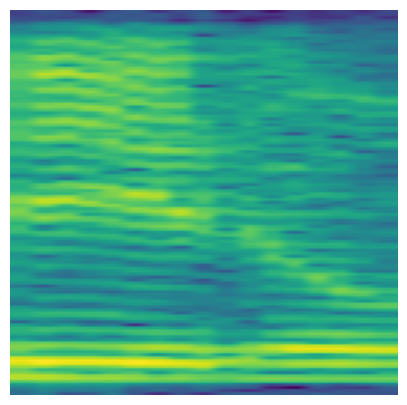

In [7]:
graph_spectrogram(f'{files[0]}')

To find the longest file i can just devide the length of the data by the ammount of frames.

In [8]:
def get_len(file):
    sound_info, frames = get_wav_info(f'{file}')
    return len(sound_info) / frames

def get_max_len(files):
    m = 0
    m_frames = 0
    m_framerate = 0
    for file in files:
        m = max(get_len(f'{file}'), m)
        data, fr = get_wav_info(f'{file}')
        m_frames= max(len(data), m_frames)
        m_framerate = max(fr, m_framerate)

    return m, m_frames, m_framerate

In [9]:
l_time, l_frames, l_framerate = get_max_len(files)

In [10]:
f'The longest file is {l_time} seconds. With {l_frames} datapoints. With a framerate of {l_framerate}' 

'The longest file is 2.28275 seconds. With 18262 datapoints. With a framerate of 8000'

In [11]:
data_arr = np.array(data)

long_arr = np.pad(data_arr, (0, l_frames - len(data_arr)))
len(long_arr)

18262

The longest file has a array size of ```{l_frames}```, and is ```{l_time}``` long (seconds).

In [12]:
import os
import wave
import pylab
#plt.ioff() # ion turns on display, ioff turns off

def graph_spectrogram(wav_file):
    sound_info, frame_rate = get_wav_info(wav_file)
    if len(sound_info) < 4000:
        #data = np.pad(sound_info, (0, 4000 - len(sound_info)), mode='edge')
        pylab.figure(num=None, figsize=(5, 4), frameon=False)
        pylab.subplot(111)
        pylab.axis(False)
        pylab.specgram(sound_info, Fs=frame_rate, cmap='magma')
        outdir = wav_file.replace("raw", "final").removesuffix('.wav')
        pylab.savefig(outdir + '.png')

def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.frombuffer(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

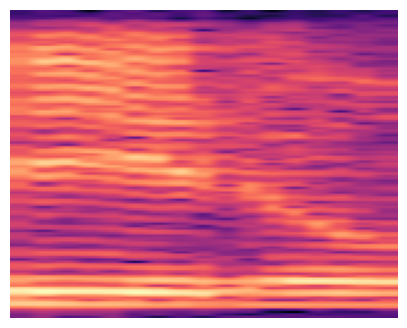

In [13]:
graph_spectrogram(f'{files[0]}')

In [89]:
def graph_all_files(files):
    for file in files:
        graph_spectrogram(f'{file}')

In [90]:
graph_all_files(files)